<a href="https://colab.research.google.com/github/Rmm6699/HW/blob/master/Hand_on_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Downloading

In [ ]:
!wget -q -O "AAPL.csv" "https://docs.google.com/uc?export=download&id=1by5VtG6XGR9OrUx4CYs37TNzaxqJhHgC"
!wget -q -O "AirPassengers.csv" "https://docs.google.com/uc?export=download&id=1MRg5tl_Vj0t53c0o0o8pIP4O-Jgq9_pm"

# SVR

##SVR on stock data (AAPL 2015)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#SVR
from sklearn.svm import SVR
#MSE
from sklearn.metrics import mean_squared_error

In [ ]:
aapl_stock_data = pd.read_csv('AAPL.csv', index_col=[0], parse_dates=[0], dayfirst=True)
aapl_closing_prices_2015 = aapl_stock_data["Close"].loc['2015-01-01':'2015-12-31']

In [ ]:
aapl_closing_prices_2015.head()

Date
2015-01-02    27.332500
2015-01-05    26.562500
2015-01-06    26.565001
2015-01-07    26.937500
2015-01-08    27.972500
Name: Close, dtype: float64

In [ ]:
aapl_closing_prices_2015.tail()

Date
2015-12-24    27.007500
2015-12-28    26.705000
2015-12-29    27.184999
2015-12-30    26.830000
2015-12-31    26.315001
Name: Close, dtype: float64

In [ ]:
aapl_closing_prices_2015.reset_index(drop=True, inplace=True)

In [ ]:
aapl_closing_prices_2015.head()

0    27.332500
1    26.562500
2    26.565001
3    26.937500
4    27.972500
Name: Close, dtype: float64

In [ ]:
aapl_closing_prices_2015.tail()

247    27.007500
248    26.705000
249    27.184999
250    26.830000
251    26.315001
Name: Close, dtype: float64

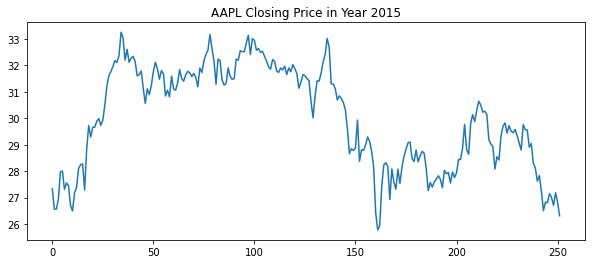

In [ ]:
aapl_closing_prices_2015.plot(title="AAPL Closing Price in Year 2015", figsize=(10,4))

In [ ]:
train_data = aapl_closing_prices_2015.iloc[:200]
test_data = aapl_closing_prices_2015.iloc[200:]

In [ ]:
train_data

0      27.332500
1      26.562500
2      26.565001
3      26.937500
4      27.972500
         ...    
195    27.900000
196    27.947500
197    27.552500
198    27.965000
199    27.760000
Name: Close, Length: 200, dtype: float64

In [ ]:
test_data

200    27.932501
201    28.442499
202    28.440001
203    28.875000
204    29.770000
205    28.820000
206    28.637501
207    29.817499
208    30.132500
209    29.875000
210    30.295000
211    30.642500
212    30.500000
213    30.230000
214    30.264999
215    30.142500
216    29.192499
217    29.027500
218    28.930000
219    28.084999
220    28.545000
221    28.422501
222    29.322500
223    29.695000
224    29.825001
225    29.437500
226    29.719999
227    29.507500
228    29.452499
229    29.575001
230    29.334999
231    29.070000
232    28.799999
233    29.757500
234    29.570000
235    29.557501
236    28.905001
237    29.042500
238    28.295000
239    28.120001
240    27.622499
241    27.834999
242    27.245001
243    26.507500
244    26.832500
245    26.807501
246    27.152500
247    27.007500
248    26.705000
249    27.184999
250    26.830000
251    26.315001
Name: Close, dtype: float64

In [ ]:
train_data_values = train_data.values
test_data_values = test_data.values

In [ ]:
train_data_values

array([27.33250046, 26.5625    , 26.56500053, 26.9375    , 27.97249985,
       28.00250053, 27.3125    , 27.55500031, 27.45000076, 26.70499992,
       26.49749947, 27.18000031, 27.38750076, 28.10000038, 28.24500084,
       28.27499962, 27.28499985, 28.82749939, 29.72500038, 29.29000092,
       29.65749931, 29.66250038, 29.88999939, 29.98500061, 29.73250008,
       29.93000031, 30.50499916, 31.21999931, 31.61499977, 31.77000046,
       31.95750046, 32.18000031, 32.11249924, 32.375     , 33.25      ,
       33.04249954, 32.19749832, 32.60499954, 32.11500168, 32.27249908,
       32.34000015, 32.13499832, 31.60250092, 31.64999962, 31.78499985,
       31.12750053, 30.55999947, 31.11249924, 30.89749908, 31.23749924,
       31.76000023, 32.11750031, 31.875     , 31.47500038, 31.80249977,
       31.67250061, 30.84499931, 31.05999947, 30.8125    , 31.59250069,
       31.10750008, 31.0625    , 31.32999992, 31.83749962, 31.50250053,
       31.39999962, 31.63999939, 31.77499962, 31.71249962, 31.57

In [ ]:
test_data_values

array([27.93250084, 28.44249916, 28.44000053, 28.875     , 29.77000046,
       28.81999969, 28.63750076, 29.81749916, 30.13249969, 29.875     ,
       30.29500008, 30.64249992, 30.5       , 30.22999954, 30.26499939,
       30.14249992, 29.19249916, 29.02750015, 28.93000031, 28.08499908,
       28.54500008, 28.42250061, 29.32250023, 29.69499969, 29.82500076,
       29.4375    , 29.71999931, 29.50749969, 29.45249939, 29.57500076,
       29.33499908, 29.06999969, 28.79999924, 29.75749969, 29.56999969,
       29.55750084, 28.90500069, 29.04249954, 28.29500008, 28.12000084,
       27.62249947, 27.83499908, 27.24500084, 26.50749969, 26.83250046,
       26.80750084, 27.15250015, 27.00749969, 26.70499992, 27.18499947,
       26.82999992, 26.31500053])

In [ ]:
#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period.
#creates a dataset where X is the stock price at a given time (t, t-1, t-2...) 
#and Y is the stock price at the next time (t + 1).
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size)]
        x.append(window)
        y.append(dataset[i+seq_size])
        
    return np.array(x),np.array(y)

In [ ]:
seq_size = 10
trainX, trainY = to_sequences(train_data_values, seq_size)
testX, testY = to_sequences(test_data_values, seq_size)

In [ ]:
trainX

array([[27.33250046, 26.5625    , 26.56500053, ..., 27.55500031,
        27.45000076, 26.70499992],
       [26.5625    , 26.56500053, 26.9375    , ..., 27.45000076,
        26.70499992, 26.49749947],
       [26.56500053, 26.9375    , 27.97249985, ..., 26.70499992,
        26.49749947, 27.18000031],
       ...,
       [27.26499939, 27.57500076, 27.39500046, ..., 27.375     ,
        28.03000069, 27.89999962],
       [27.57500076, 27.39500046, 27.59499931, ..., 28.03000069,
        27.89999962, 27.94750023],
       [27.39500046, 27.59499931, 27.69499969, ..., 27.89999962,
        27.94750023, 27.55249977]])

In [ ]:
trainY

array([26.49749947, 27.18000031, 27.38750076, 28.10000038, 28.24500084,
       28.27499962, 27.28499985, 28.82749939, 29.72500038, 29.29000092,
       29.65749931, 29.66250038, 29.88999939, 29.98500061, 29.73250008,
       29.93000031, 30.50499916, 31.21999931, 31.61499977, 31.77000046,
       31.95750046, 32.18000031, 32.11249924, 32.375     , 33.25      ,
       33.04249954, 32.19749832, 32.60499954, 32.11500168, 32.27249908,
       32.34000015, 32.13499832, 31.60250092, 31.64999962, 31.78499985,
       31.12750053, 30.55999947, 31.11249924, 30.89749908, 31.23749924,
       31.76000023, 32.11750031, 31.875     , 31.47500038, 31.80249977,
       31.67250061, 30.84499931, 31.05999947, 30.8125    , 31.59250069,
       31.10750008, 31.0625    , 31.32999992, 31.83749962, 31.50250053,
       31.39999962, 31.63999939, 31.77499962, 31.71249962, 31.57500076,
       31.69499969, 31.54249954, 31.1875    , 31.89999962, 31.72750092,
       32.15499878, 32.41749954, 32.56999969, 33.16249847, 32.63

In [ ]:
testX

array([[27.93250084, 28.44249916, 28.44000053, 28.875     , 29.77000046,
        28.81999969, 28.63750076, 29.81749916, 30.13249969, 29.875     ],
       [28.44249916, 28.44000053, 28.875     , 29.77000046, 28.81999969,
        28.63750076, 29.81749916, 30.13249969, 29.875     , 30.29500008],
       [28.44000053, 28.875     , 29.77000046, 28.81999969, 28.63750076,
        29.81749916, 30.13249969, 29.875     , 30.29500008, 30.64249992],
       [28.875     , 29.77000046, 28.81999969, 28.63750076, 29.81749916,
        30.13249969, 29.875     , 30.29500008, 30.64249992, 30.5       ],
       [29.77000046, 28.81999969, 28.63750076, 29.81749916, 30.13249969,
        29.875     , 30.29500008, 30.64249992, 30.5       , 30.22999954],
       [28.81999969, 28.63750076, 29.81749916, 30.13249969, 29.875     ,
        30.29500008, 30.64249992, 30.5       , 30.22999954, 30.26499939],
       [28.63750076, 29.81749916, 30.13249969, 29.875     , 30.29500008,
        30.64249992, 30.5       , 30.22999954

In [ ]:
testY

array([30.29500008, 30.64249992, 30.5       , 30.22999954, 30.26499939,
       30.14249992, 29.19249916, 29.02750015, 28.93000031, 28.08499908,
       28.54500008, 28.42250061, 29.32250023, 29.69499969, 29.82500076,
       29.4375    , 29.71999931, 29.50749969, 29.45249939, 29.57500076,
       29.33499908, 29.06999969, 28.79999924, 29.75749969, 29.56999969,
       29.55750084, 28.90500069, 29.04249954, 28.29500008, 28.12000084,
       27.62249947, 27.83499908, 27.24500084, 26.50749969, 26.83250046,
       26.80750084, 27.15250015, 27.00749969, 26.70499992, 27.18499947,
       26.82999992])

In [ ]:
#SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(trainX, trainY)

SVR(C=1000)

In [ ]:
svr_rbf_confidence = svr_rbf.score(testX, testY)
print('svr_rbf accuracy (Confidence): ' , svr_rbf_confidence)

svr_rbf accuracy (Confidence):  0.5036946719192483


In [ ]:
trainPredict = svr_rbf.predict(trainX)
testPredict = svr_rbf.predict(testX)

In [ ]:
trainPredict

array([26.59776084, 27.26148456, 27.48771765, 28.00012064, 28.1450219 ,
       28.17525212, 27.38530944, 28.72769729, 29.62503853, 29.39040942,
       29.55758246, 29.5626183 , 29.79001387, 29.88491652, 29.63217418,
       30.03007149, 30.60515302, 31.11948217, 31.71480371, 31.6698339 ,
       31.88717648, 32.07969417, 32.21243583, 32.27453998, 33.14985309,
       32.94237314, 32.29747185, 32.50483256, 32.21527527, 32.37244603,
       32.44035343, 32.03488587, 31.70255642, 31.55022424, 31.88540985,
       31.37991544, 31.01276834, 31.01261192, 30.99722259, 31.13766794,
       31.65975309, 32.01742257, 31.97462165, 31.57478831, 31.70215886,
       31.58904182, 31.01571033, 30.95988689, 30.91262183, 31.49220901,
       31.20746606, 31.162437  , 31.23022402, 31.73727246, 31.60241266,
       31.46322832, 31.73951545, 31.678986  , 31.58083284, 31.75599147,
       31.67460565, 31.64207605, 31.4286367 , 31.27052287, 31.74789879,
       31.78684596, 31.99709985, 32.46987469, 32.79673972, 32.74

In [ ]:
testPredict

array([29.90377561, 30.78184729, 30.91199083, 29.50225517, 30.72265556,
       31.64121943, 30.39357286, 28.71406812, 29.50173886, 28.93367751,
       28.66626134, 28.21787398, 28.25814565, 28.65082802, 28.40779278,
       29.00496997, 28.43283382, 29.14092544, 28.46144911, 29.67735084,
       29.84356784, 29.51928185, 28.60910878, 28.1918646 , 29.88136174,
       29.10499553, 29.63546959, 28.29152614, 28.28017507, 26.74213288,
       27.94527902, 27.58866245, 28.02101226, 27.62628641, 27.60567038,
       27.78479534, 27.89293328, 27.76914867, 28.34827107, 27.81058779,
       28.11317969])

In [ ]:
#Training MSE
train_pred_mse = mean_squared_error(trainY, trainPredict)
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

train pred MSE:  0.026701454700101646
train pred RMSE:  0.16340579763307558


In [ ]:
#Testing MSE
test_pred_mse = mean_squared_error(testY, testPredict)
print("test pred MSE: ", test_pred_mse)
#Testing RMSE
test_pred_rmse = np.sqrt(test_pred_mse)
print("test pred RMSE: ", test_pred_rmse)

test pred MSE:  0.7038752565947267
test pred RMSE:  0.8389727388865068


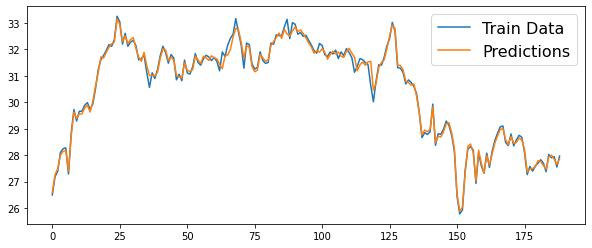

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(trainY)
plt.plot(trainPredict)

plt.legend(('Train Data', 'Predictions'), fontsize=16)

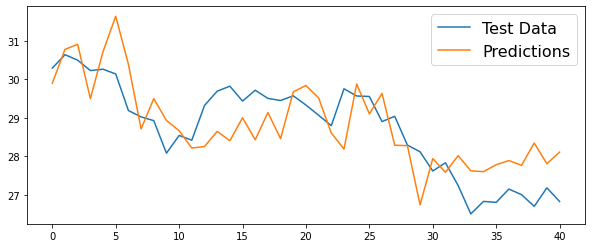

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(testY)
plt.plot(testPredict)

plt.legend(('Test Data', 'Predictions'), fontsize=16)

## SVR on stock data (AAPL 2018)

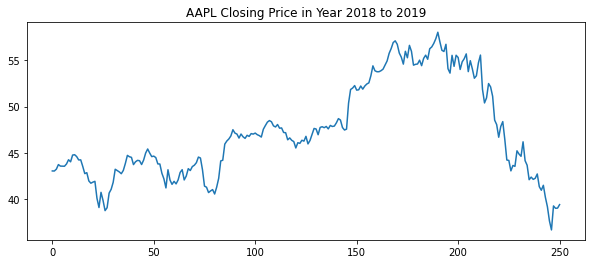

In [ ]:
aapl_closing_prices_2018_2019 = aapl_stock_data["Close"].loc['2018-01-01':'2018-12-31']
aapl_closing_prices_2018_2019.reset_index(drop=True, inplace=True)
aapl_closing_prices_2018_2019.plot(title="AAPL Closing Price in Year 2018 to 2019", figsize=(10,4))

In [ ]:
train_data = aapl_closing_prices_2018_2019.iloc[:225]
test_data = aapl_closing_prices_2018_2019.iloc[225:]
train_data_values = train_data.values
test_data_values = test_data.values

In [ ]:
#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period.
#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1).
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size)]
        x.append(window)
        y.append(dataset[i+seq_size])
        
    return np.array(x),np.array(y)

In [ ]:
seq_size = 10
trainX, trainY = to_sequences(train_data_values, seq_size)
testX, testY = to_sequences(test_data_values, seq_size)

In [ ]:
#SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(trainX, trainY)

SVR(C=1000)

In [ ]:
svr_rbf_confidence = svr_rbf.score(testX, testY)
print('svr_rbf accuracy (Confidence): ' , svr_rbf_confidence)

svr_rbf accuracy (Confidence):  0.27157182090188736


In [ ]:
# make predictions
trainPredict = svr_rbf.predict(trainX)
testPredict = svr_rbf.predict(testX)

In [ ]:
#Training MSE
train_pred_mse = mean_squared_error(trainY, trainPredict)
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

train pred MSE:  0.2089330747842914
train pred RMSE:  0.45709197628517984


In [ ]:
#Testing MSE
test_pred_mse = mean_squared_error(testY, testPredict)
print("test pred MSE: ", test_pred_mse)
#Testing RMSE
test_pred_rmse = np.sqrt(test_pred_mse)
print("test pred RMSE: ", test_pred_rmse)

test pred MSE:  2.3739821158179413
test pred RMSE:  1.5407732201131812


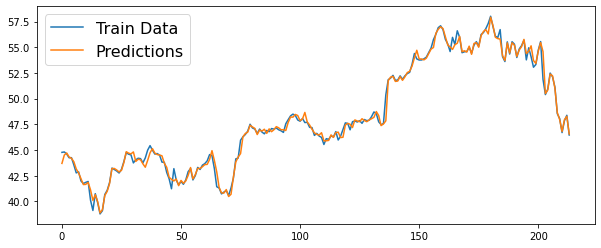

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(trainY)
plt.plot(trainPredict)

plt.legend(('Train Data', 'Predictions'), fontsize=16)

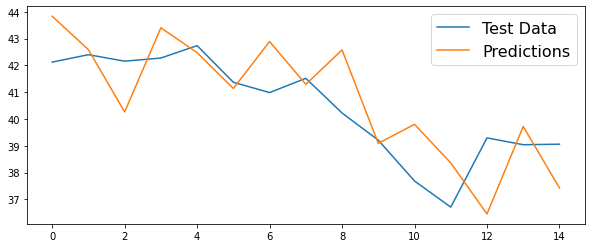

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(testY)
plt.plot(testPredict)

plt.legend(('Test Data', 'Predictions'), fontsize=16)

## SVR on stock data (AAPL 2019)

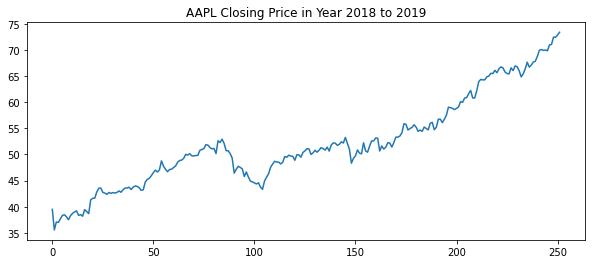

In [ ]:
aapl_closing_prices_2018_2019 = aapl_stock_data["Close"].loc['2019-01-01':'2019-12-31']
aapl_closing_prices_2018_2019.reset_index(drop=True, inplace=True)
aapl_closing_prices_2018_2019.plot(title="AAPL Closing Price in Year 2018 to 2019", figsize=(10,4))

In [ ]:
train_data = aapl_closing_prices_2018_2019.iloc[:225]
test_data = aapl_closing_prices_2018_2019.iloc[225:]
train_data_values = train_data.values
test_data_values = test_data.values

In [ ]:
#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period.
#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1).
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size)]
        x.append(window)
        y.append(dataset[i+seq_size])
        
    return np.array(x),np.array(y)

In [ ]:
seq_size = 10
trainX, trainY = to_sequences(train_data_values, seq_size)
testX, testY = to_sequences(test_data_values, seq_size)

In [ ]:
#SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(trainX, trainY)

SVR(C=1000)

In [ ]:
svr_rbf_confidence = svr_rbf.score(testX, testY)
print('svr_rbf accuracy (Confidence): ' , svr_rbf_confidence)

svr_rbf accuracy (Confidence):  -20.07534018003664


In [ ]:
# make predictions
trainPredict = svr_rbf.predict(trainX)
testPredict = svr_rbf.predict(testX)

In [ ]:
#Training MSE
train_pred_mse = mean_squared_error(trainY, trainPredict)
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

train pred MSE:  0.32441077491704345
train pred RMSE:  0.5695706935201665


In [ ]:
#Testing MSE
test_pred_mse = mean_squared_error(testY, testPredict)
print("test pred MSE: ", test_pred_mse)
#Testing RMSE
test_pred_rmse = np.sqrt(test_pred_mse)
print("test pred RMSE: ", test_pred_rmse)

test pred MSE:  75.26857530899404
test pred RMSE:  8.67574638339515


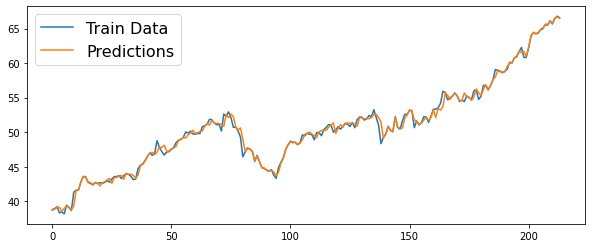

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(trainY)
plt.plot(trainPredict)

plt.legend(('Train Data', 'Predictions'), fontsize=16)

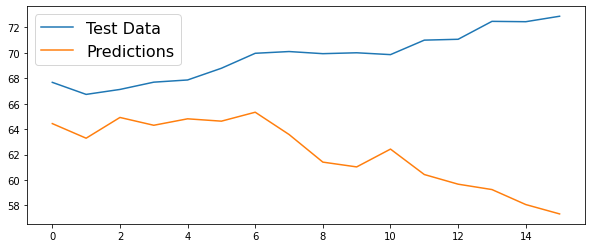

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(testY)
plt.plot(testPredict)

plt.legend(('Test Data', 'Predictions'), fontsize=16)

## SVR on stock data (AAPL 2018-2019)

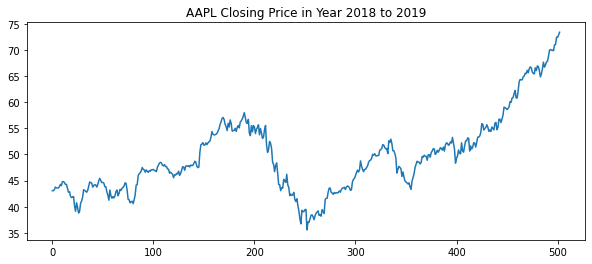

In [ ]:
aapl_closing_prices_2018_2019 = aapl_stock_data["Close"].loc['2018-01-01':'2019-12-31']
aapl_closing_prices_2018_2019.reset_index(drop=True, inplace=True)
aapl_closing_prices_2018_2019.plot(title="AAPL Closing Price in Year 2018 to 2019", figsize=(10,4))

In [ ]:
train_data = aapl_closing_prices_2018_2019.iloc[:450]
test_data = aapl_closing_prices_2018_2019.iloc[450:]
train_data_values = train_data.values
test_data_values = test_data.values

In [ ]:
#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period.
#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1).
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size)]
        x.append(window)
        y.append(dataset[i+seq_size])
        
    return np.array(x),np.array(y)

In [ ]:
seq_size = 10
trainX, trainY = to_sequences(train_data_values, seq_size)
testX, testY = to_sequences(test_data_values, seq_size)

In [ ]:
#SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(trainX, trainY)

SVR(C=1000)

In [ ]:
svr_rbf_confidence = svr_rbf.score(testX, testY)
print('svr_rbf accuracy (Confidence): ' , svr_rbf_confidence)

svr_rbf accuracy (Confidence):  -72.943317190077


In [ ]:
# make predictions
trainPredict = svr_rbf.predict(trainX)
testPredict = svr_rbf.predict(testX)

In [ ]:
#Training MSE
train_pred_mse = mean_squared_error(trainY, trainPredict)
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

train pred MSE:  0.3594213951163798
train pred RMSE:  0.5995176353672841


In [ ]:
#Testing MSE
test_pred_mse = mean_squared_error(testY, testPredict)
print("test pred MSE: ", test_pred_mse)
#Testing RMSE
test_pred_rmse = np.sqrt(test_pred_mse)
print("test pred RMSE: ", test_pred_rmse)

test pred MSE:  527.5307280672348
test pred RMSE:  22.968037096522522


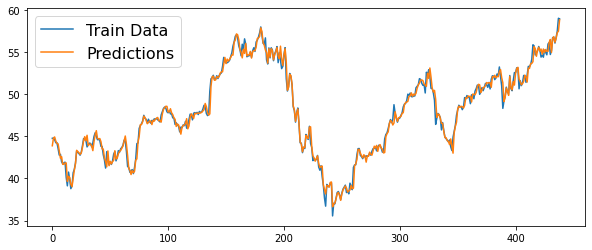

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(trainY)
plt.plot(trainPredict)

plt.legend(('Train Data', 'Predictions'), fontsize=16)

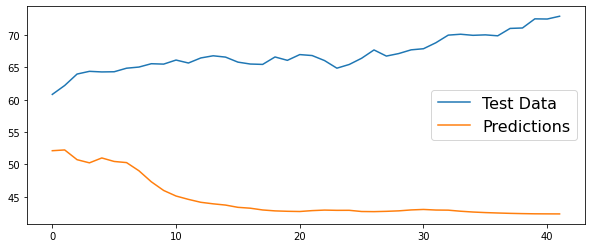

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(testY)
plt.plot(testPredict)

plt.legend(('Test Data', 'Predictions'), fontsize=16)

##SVR on AirPassenger 

In [ ]:
air_passengers_data = pd.read_csv('AirPassengers.csv', index_col=[0], parse_dates=[0])

In [ ]:
air_passengers_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
air_passengers_data.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


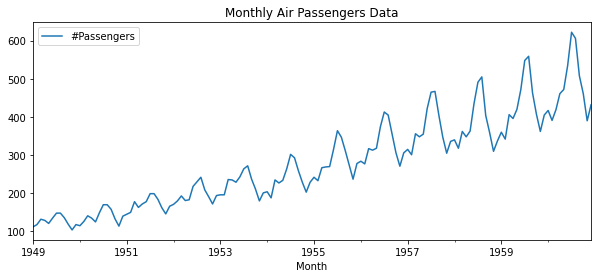

In [ ]:
air_passengers_data.plot(title="Monthly Air Passengers Data", figsize=(10,4))

In [ ]:
data_values = air_passengers_data.values

In [ ]:
data_values

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [ ]:
dataset = data_values.astype('float32') #Convert values to float

In [ ]:
#We cannot use random way of splitting dataset into train and test as
#the sequence of events is important for time series.
#So let us take first 80% values for train and the remaining for testing
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

In [ ]:
train

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [ ]:
train.size

115

In [ ]:
test.size

29

In [ ]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [ ]:
seq_size = 12
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [ ]:
trainX

array([[112., 118., 132., ..., 119., 104., 118.],
       [118., 132., 129., ..., 104., 118., 115.],
       [132., 129., 121., ..., 118., 115., 126.],
       ...,
       [348., 355., 422., ..., 340., 318., 362.],
       [355., 422., 465., ..., 318., 362., 348.],
       [422., 465., 467., ..., 362., 348., 363.]], dtype=float32)

In [ ]:
#SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(trainX, trainY)

SVR(C=1000)

In [ ]:
svr_rbf_confidence = svr_rbf.score(testX, testY)

In [ ]:
trainPredict = svr_rbf.predict(trainX)
testPredict = svr_rbf.predict(testX)

In [ ]:
#Training MSE
train_pred_mse = mean_squared_error(trainY, trainPredict)
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

train pred MSE:  28.048716704927653
train pred RMSE:  5.296103917497055


In [ ]:
#Testing MSE
test_pred_mse = mean_squared_error(testY, testPredict)
print("test pred MSE: ", test_pred_mse)
#Testing RMSE
test_pred_rmse = np.sqrt(test_pred_mse)
print("test pred RMSE: ", test_pred_rmse)

test pred MSE:  18231.836348444558
test pred RMSE:  135.02531743508163


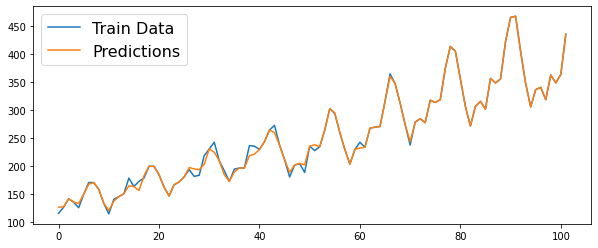

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(trainY)
plt.plot(trainPredict)

plt.legend(('Train Data', 'Predictions'), fontsize=16)

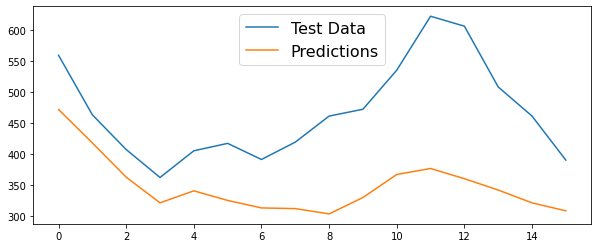

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(testY)
plt.plot(testPredict)

plt.legend(('Test Data', 'Predictions'), fontsize=16)

## Practice of SVR

plesae try to use different parameter of SVR to improve the performance of SVR

### Data selection

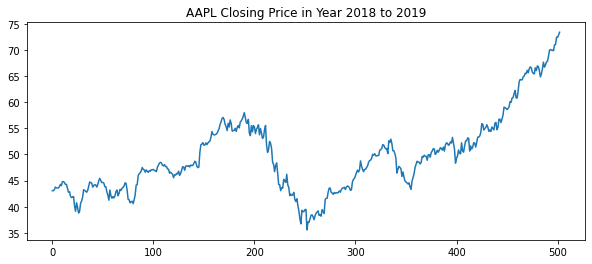

In [ ]:
aapl_stock_data = pd.read_csv('AAPL.csv', index_col=[0], parse_dates=[0], dayfirst=True)
aapl_closing_prices_2018_2019 = aapl_stock_data["Close"].loc['2018-01-01':'2019-12-31'] # you can select different data
aapl_closing_prices_2018_2019.reset_index(drop=True, inplace=True)
aapl_closing_prices_2018_2019.plot(title="AAPL Closing Price in Year 2018 to 2019", figsize=(10,4))

### parameter settings

In [ ]:
training_size=450 #The amount of training data
seq_size = 10 #The sequence size
regularization = 10 #The parameter of regulaization term
use_kernel='rbf' #The kernel of SVR

### The followong code is fixed

In [ ]:
train_data = aapl_closing_prices_2018_2019.iloc[:training_size] 
test_data = aapl_closing_prices_2018_2019.iloc[training_size:]
train_data_values = train_data.values
test_data_values = test_data.values

In [ ]:
#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period.
#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1).
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size)]
        x.append(window)
        y.append(dataset[i+seq_size])
        
    return np.array(x),np.array(y)

In [ ]:
trainX, trainY = to_sequences(train_data_values, seq_size)
testX, testY = to_sequences(test_data_values, seq_size)

In [ ]:
#SVR
svr_rbf = SVR(kernel=use_kernel, C=regularization)
svr_rbf.fit(trainX, trainY)

SVR(C=10)

In [ ]:
svr_rbf_confidence = svr_rbf.score(testX, testY)
print('svr_rbf accuracy (Confidence): ' , svr_rbf_confidence)

svr_rbf accuracy (Confidence):  -54.23394944334985


In [ ]:
# make predictions
trainPredict = svr_rbf.predict(trainX)
testPredict = svr_rbf.predict(testX)

In [ ]:
#Training MSE
train_pred_mse = mean_squared_error(trainY, trainPredict)
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

train pred MSE:  0.6477221243623553
train pred RMSE:  0.8048118564996141


In [ ]:
#Testing MSE
test_pred_mse = mean_squared_error(testY, testPredict)
print("test pred MSE: ", test_pred_mse)
#Testing RMSE
test_pred_rmse = np.sqrt(test_pred_mse)
print("test pred RMSE: ", test_pred_rmse)

test pred MSE:  394.05326500268745
test pred RMSE:  19.850774921969354


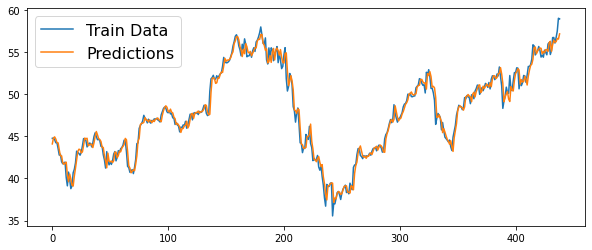

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(trainY)
plt.plot(trainPredict)

plt.legend(('Train Data', 'Predictions'), fontsize=16)

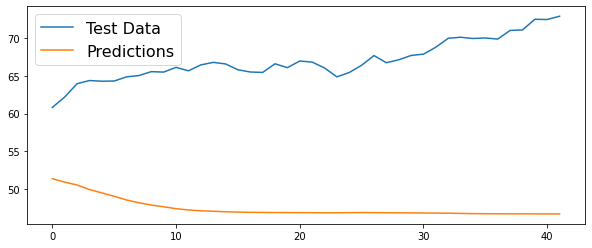

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(testY)
plt.plot(testPredict)

plt.legend(('Test Data', 'Predictions'), fontsize=16)

#NN

##NN on stock data (Normalized version 2018-2019)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#For NN
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
#MSE
from sklearn.metrics import mean_squared_error

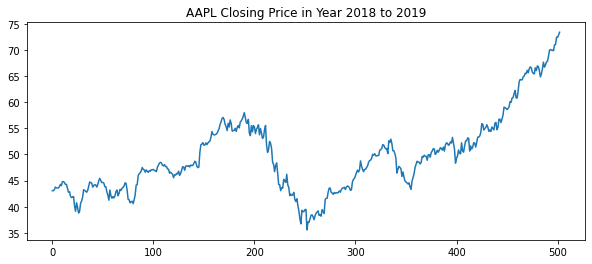

In [ ]:
aapl_stock_data = pd.read_csv('AAPL.csv', index_col=[0], parse_dates=[0], dayfirst=True)
aapl_closing_prices_2018_2019 = aapl_stock_data["Close"].loc['2018-01-01':'2019-12-31']
aapl_closing_prices_2018_2019.reset_index(drop=True, inplace=True)
aapl_closing_prices_2018_2019.plot(title="AAPL Closing Price in Year 2018 to 2019", figsize=(10,4))

In [ ]:
train_data = aapl_closing_prices_2018_2019.iloc[:450]
test_data = aapl_closing_prices_2018_2019.iloc[450:]

In [ ]:
train_data

0      43.064999
1      43.057499
2      43.257500
3      43.750000
4      43.587502
         ...    
445    56.757500
446    57.522499
447    59.052502
448    58.967499
449    58.830002
Name: Close, Length: 450, dtype: float64

In [ ]:
test_data

450    58.592499
451    58.820000
452    59.102501
453    60.127499
454    59.990002
455    60.794998
456    60.895000
457    61.645000
458    62.262501
459    60.822498
460    60.814999
461    62.189999
462    63.955002
463    64.375000
464    64.282501
465    64.309998
466    64.857498
467    65.035004
468    65.550003
469    65.489998
470    66.117500
471    65.660004
472    66.440002
473    66.775002
474    66.572502
475    65.797501
476    65.502502
477    65.445000
478    66.592499
479    66.072502
480    66.959999
481    66.812500
482    66.040001
483    64.862503
484    65.434998
485    66.394997
486    67.677498
487    66.730003
488    67.120003
489    67.692497
490    67.864998
491    68.787498
492    69.964996
493    70.102501
494    69.934998
495    70.004997
496    69.860001
497    71.000000
498    71.067497
499    72.477501
500    72.449997
501    72.879997
502    73.412498
Name: Close, dtype: float64

In [ ]:
data_df = pd.DataFrame(aapl_closing_prices_2018_2019)
scaler = MinMaxScaler()
scaler.fit(data_df)

MinMaxScaler()

In [ ]:
scaled_data=scaler.transform(data_df)

In [ ]:
scaled_train_data = scaled_data[:450]
scaled_test_data = scaled_data[450:]

In [ ]:
scaled_train_data

array([[0.19853423],
       [0.19833616],
       [0.2036181 ],
       [0.21662485],
       [0.21233333],
       [0.21220125],
       [0.2119371 ],
       [0.21847351],
       [0.23042385],
       [0.22448172],
       [0.24369474],
       [0.24475105],
       [0.23946921],
       [0.22982965],
       [0.23009371],
       [0.21147498],
       [0.1909415 ],
       [0.19358242],
       [0.17014397],
       [0.16360755],
       [0.1666446 ],
       [0.16895549],
       [0.12088999],
       [0.09441439],
       [0.13759407],
       [0.11455164],
       [0.08556709],
       [0.09388619],
       [0.13548135],
       [0.1462432 ],
       [0.16624848],
       [0.20335405],
       [0.19965662],
       [0.19582732],
       [0.19067745],
       [0.20011884],
       [0.21992605],
       [0.2428364 ],
       [0.23900699],
       [0.23722431],
       [0.21662485],
       [0.2246138 ],
       [0.22864127],
       [0.22765085],
       [0.21682291],
       [0.22943353],
       [0.24950479],
       [0.260

In [ ]:
scaled_test_data

array([[0.60860952],
       [0.61461773],
       [0.62207848],
       [0.64914827],
       [0.64551703],
       [0.66677668],
       [0.6694177 ],
       [0.68922491],
       [0.70553286],
       [0.66750295],
       [0.66730488],
       [0.7036181 ],
       [0.75023116],
       [0.76132315],
       [0.75888029],
       [0.75960646],
       [0.77406574],
       [0.77875359],
       [0.79235453],
       [0.79076981],
       [0.80734191],
       [0.7952596 ],
       [0.81585907],
       [0.82470626],
       [0.81935833],
       [0.79889084],
       [0.79110005],
       [0.78958143],
       [0.81988644],
       [0.80615353],
       [0.82959198],
       [0.82569658],
       [0.80529518],
       [0.77419792],
       [0.78931728],
       [0.81467048],
       [0.84854084],
       [0.82351788],
       [0.83381761],
       [0.84893697],
       [0.85349265],
       [0.87785553],
       [0.9089528 ],
       [0.91258424],
       [0.90816054],
       [0.91000921],
       [0.9061799 ],
       [0.936

In [ ]:
#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period.
#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1).
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [ ]:
seq_size = 20
#Train and Test data
trainX, trainY = to_sequences(scaled_train_data, seq_size)
testX, testY = to_sequences(scaled_test_data, seq_size)

In [ ]:
model_stock = Sequential()
model_stock.add(Dense(64, input_dim=seq_size, activation='relu')) 
model_stock.add(Dense(32, activation='relu'))  
model_stock.add(Dense(1))
model_stock.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])
print(model_stock.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1344      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_stock.fit(trainX, trainY, validation_split=0.1,
          verbose=1, epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 16ms/step - loss: 0.0895 - mse: 0.0895 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 8.3967e-04 - val_mse: 8.3967e-04
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 8.2050e-04 - val_mse: 8.2050e-04
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 8.3770e-04 - val_mse: 8.3770e-04
Epoch 8/20
13/13 [==============================] - 0s 4ms/step -

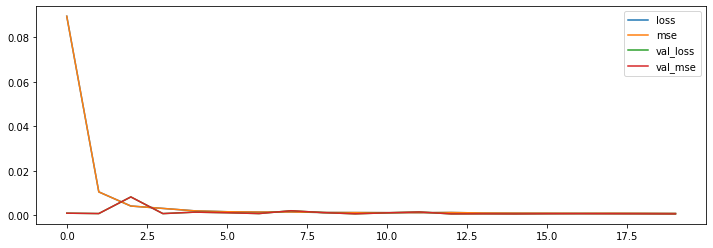

In [ ]:
losses = pd.DataFrame(model_stock.history.history)
losses.plot(figsize=(12,4))

In [ ]:
# make predictions
trainPredict = model_stock.predict(trainX)
testPredict = model_stock.predict(testX)

In [ ]:
# Estimate model performance
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [ ]:
#Training MSE
train_pred_mse = mean_squared_error(trainY_inverse[0], trainPredict[:,0])
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

train pred MSE:  1.266575544254392
train pred RMSE:  1.1254223848202025


In [ ]:
#Testing MSE
test_pred_mse = mean_squared_error(testY_inverse[0], testPredict[:,0])
print("test pred MSE: ", test_pred_mse)
#Testing RMSE
test_pred_rmse = np.sqrt(test_pred_mse)
print("test pred RMSE: ", test_pred_rmse)

test pred MSE:  2.0110630791969015
test pred RMSE:  1.4181195574410859


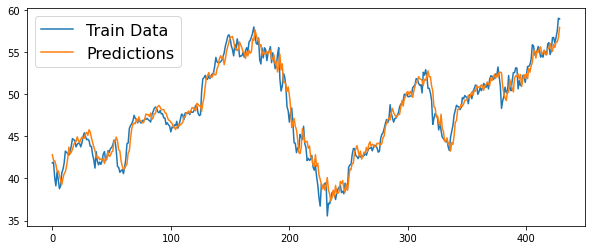

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(trainY_inverse[0])
plt.plot(trainPredict[:,0])

plt.legend(('Train Data', 'Predictions'), fontsize=16)

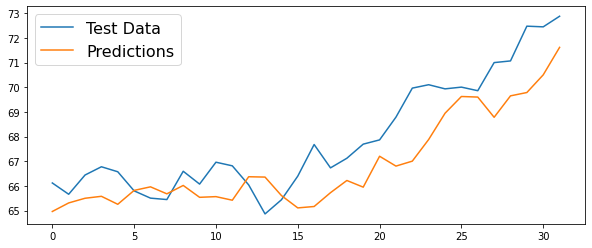

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(testY_inverse[0])
plt.plot(testPredict[:,0])

plt.legend(('Test Data', 'Predictions'), fontsize=16)

## NN on stock data (Unnormalized version 2018-2019)

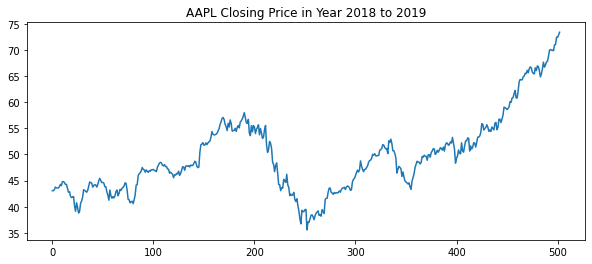

In [ ]:
aapl_closing_prices_2018_2019 = aapl_stock_data["Close"].loc['2018-01-01':'2019-12-31']
aapl_closing_prices_2018_2019.reset_index(drop=True, inplace=True)
aapl_closing_prices_2018_2019.plot(title="AAPL Closing Price in Year 2018 to 2019", figsize=(10,4))

In [ ]:
train_data = aapl_closing_prices_2018_2019.iloc[:450]
test_data = aapl_closing_prices_2018_2019.iloc[450:]
train_data_values = train_data.values
test_data_values = test_data.values

In [ ]:
#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period.
#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1).
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size)]
        x.append(window)
        y.append(dataset[i+seq_size])
        
    return np.array(x),np.array(y)

In [ ]:
seq_size = 10
trainX, trainY = to_sequences(train_data_values, seq_size)
testX, testY = to_sequences(test_data_values, seq_size)

In [ ]:
model_stock_UN = Sequential()
model_stock_UN.add(Dense(64, input_dim=seq_size, activation='relu')) 
model_stock_UN.add(Dense(32, activation='relu'))  
model_stock_UN.add(Dense(1))
model_stock_UN.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])
print(model_stock_UN.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_stock_UN.fit(trainX, trainY, validation_split=0.1,
          verbose=2, epochs=20)

Epoch 1/20
13/13 - 1s - loss: 4800.1597 - mse: 4800.1597 - val_loss: 2311.3706 - val_mse: 2311.3706 - 1s/epoch - 96ms/step
Epoch 2/20
13/13 - 0s - loss: 778.7252 - mse: 778.7252 - val_loss: 82.1502 - val_mse: 82.1502 - 45ms/epoch - 3ms/step
Epoch 3/20
13/13 - 0s - loss: 29.0903 - mse: 29.0903 - val_loss: 78.1477 - val_mse: 78.1477 - 51ms/epoch - 4ms/step
Epoch 4/20
13/13 - 0s - loss: 51.9228 - mse: 51.9228 - val_loss: 5.5613 - val_mse: 5.5613 - 52ms/epoch - 4ms/step
Epoch 5/20
13/13 - 0s - loss: 4.9318 - mse: 4.9318 - val_loss: 13.2029 - val_mse: 13.2029 - 46ms/epoch - 4ms/step
Epoch 6/20
13/13 - 0s - loss: 6.4632 - mse: 6.4632 - val_loss: 3.4581 - val_mse: 3.4581 - 55ms/epoch - 4ms/step
Epoch 7/20
13/13 - 0s - loss: 3.0305 - mse: 3.0305 - val_loss: 1.2126 - val_mse: 1.2126 - 50ms/epoch - 4ms/step
Epoch 8/20
13/13 - 0s - loss: 2.9972 - mse: 2.9972 - val_loss: 1.9951 - val_mse: 1.9951 - 43ms/epoch - 3ms/step
Epoch 9/20
13/13 - 0s - loss: 2.8464 - mse: 2.8464 - val_loss: 2.2820 - val_mse

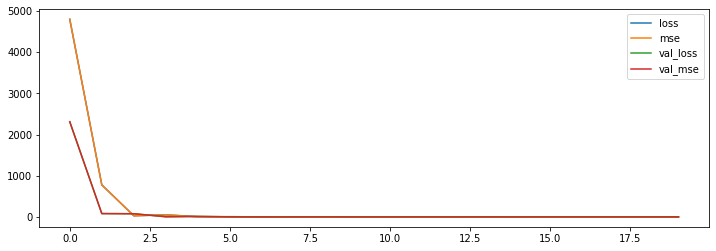

In [ ]:
losses = pd.DataFrame(model_stock_UN.history.history)
losses.plot(figsize=(12,4))

In [ ]:
# make predictions
trainPredict = model_stock_UN.predict(trainX)
testPredict = model_stock_UN.predict(testX)

In [ ]:
#Training MSE
train_pred_mse = mean_squared_error(trainY, trainPredict)
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

train pred MSE:  2.6448258256751784
train pred RMSE:  1.6262920480882819


In [ ]:
#Testing MSE
test_pred_mse = mean_squared_error(testY, testPredict)
print("test pred MSE: ", test_pred_mse)
#Testing RMSE
test_pred_rmse = np.sqrt(test_pred_mse)
print("test pred RMSE: ", test_pred_rmse)

test pred MSE:  3.150003006175254
test pred RMSE:  1.7748247818236182


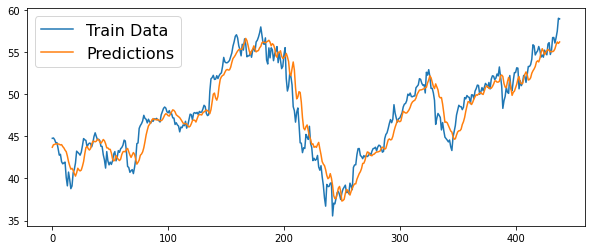

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(trainY)
plt.plot(trainPredict)

plt.legend(('Train Data', 'Predictions'), fontsize=16)

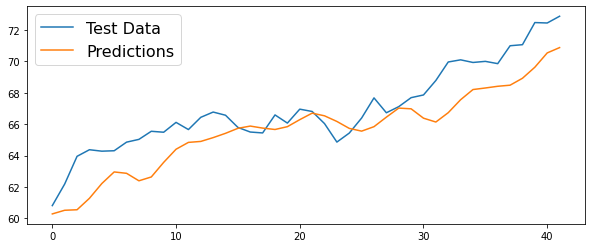

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(testY)
plt.plot(testPredict)

plt.legend(('Test Data', 'Predictions'), fontsize=16)

##NN on stock data (Normalized version 2018)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#For NN
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
#MSE
from sklearn.metrics import mean_squared_error

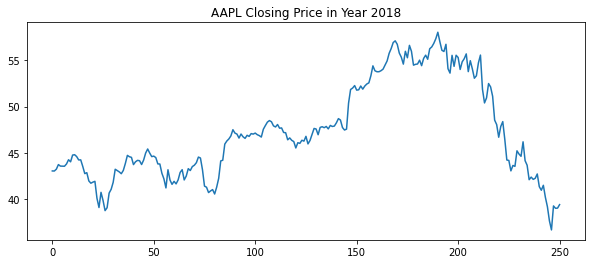

In [ ]:
aapl_stock_data = pd.read_csv('AAPL.csv', index_col=[0], parse_dates=[0], dayfirst=True)
aapl_closing_prices_2018_2019 = aapl_stock_data["Close"].loc['2018-01-01':'2018-12-31']
aapl_closing_prices_2018_2019.reset_index(drop=True, inplace=True)
aapl_closing_prices_2018_2019.plot(title="AAPL Closing Price in Year 2018", figsize=(10,4))

In [ ]:
train_data = aapl_closing_prices_2018_2019.iloc[:225]
test_data = aapl_closing_prices_2018_2019.iloc[225:]

In [ ]:
data_df = pd.DataFrame(aapl_closing_prices_2018_2019)
scaler = MinMaxScaler()
scaler.fit(data_df)

MinMaxScaler()

In [ ]:
scaled_data=scaler.transform(data_df)

In [ ]:
scaled_train_data = scaled_data[:200]
scaled_test_data = scaled_data[200:]

In [ ]:
#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period.
#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1).
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [ ]:
seq_size = 20
#Train and Test data
trainX, trainY = to_sequences(scaled_train_data, seq_size)
testX, testY = to_sequences(scaled_test_data, seq_size)

In [ ]:
model_stock = Sequential()
model_stock.add(Dense(64, input_dim=seq_size, activation='relu')) 
model_stock.add(Dense(32, activation='relu'))  
model_stock.add(Dense(1))
model_stock.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])
print(model_stock.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                1344      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_stock.fit(trainX, trainY, validation_split=0.1,
          verbose=1, epochs=20)

Epoch 1/20
6/6 [==============================] - 1s 32ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 3/20
6/6 [==============================] - 0s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 4/20
6/6 [==============================] - 0s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 5/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 6/20
6/6 [==============================] - 0s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 7/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 8/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 

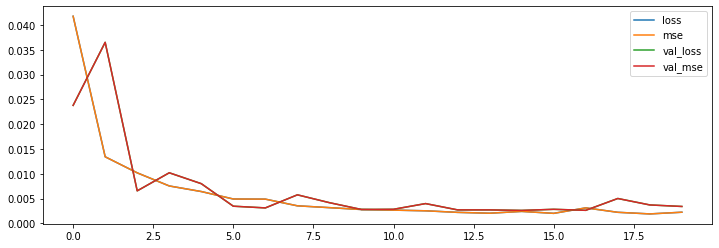

In [ ]:
losses = pd.DataFrame(model_stock.history.history)
losses.plot(figsize=(12,4))

In [ ]:
# make predictions
trainPredict = model_stock.predict(trainX)
testPredict = model_stock.predict(testX)

In [ ]:
# Estimate model performance
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [ ]:
#Training MSE
train_pred_mse = mean_squared_error(trainY_inverse[0], trainPredict[:,0])
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

train pred MSE:  0.9416780087167004
train pred RMSE:  0.9704009525534795


In [ ]:
#Testing MSE
test_pred_mse = mean_squared_error(testY_inverse[0], testPredict[:,0])
print("test pred MSE: ", test_pred_mse)
#Testing RMSE
test_pred_rmse = np.sqrt(test_pred_mse)
print("test pred RMSE: ", test_pred_rmse)

test pred MSE:  6.505477865357536
test pred RMSE:  2.550583828333728


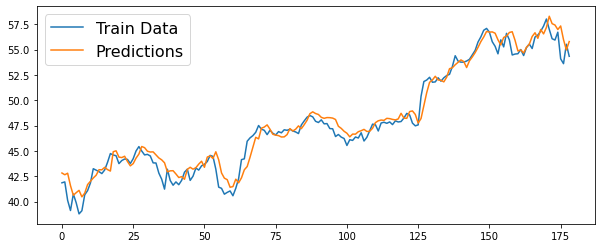

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(trainY_inverse[0])
plt.plot(trainPredict[:,0])

plt.legend(('Train Data', 'Predictions'), fontsize=16)

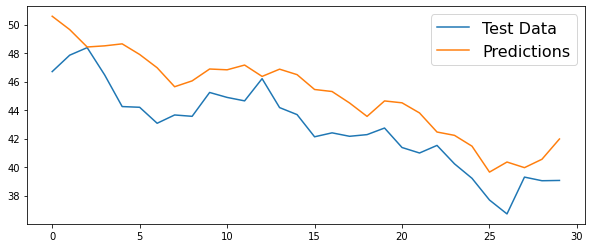

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(testY_inverse[0])
plt.plot(testPredict[:,0])

plt.legend(('Test Data', 'Predictions'), fontsize=16)

##NN on stock data (Normalized version 2019)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#For NN
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
#MSE
from sklearn.metrics import mean_squared_error

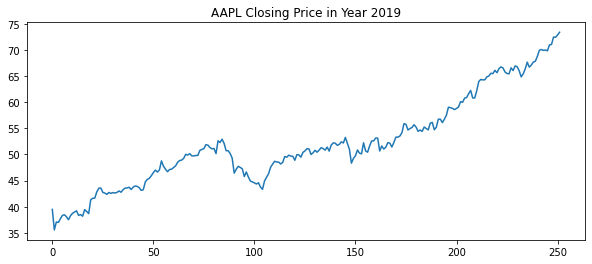

In [ ]:
aapl_stock_data = pd.read_csv('AAPL.csv', index_col=[0], parse_dates=[0], dayfirst=True)
aapl_closing_prices_2018_2019 = aapl_stock_data["Close"].loc['2019-01-01':'2019-12-31']
aapl_closing_prices_2018_2019.reset_index(drop=True, inplace=True)
aapl_closing_prices_2018_2019.plot(title="AAPL Closing Price in Year 2019", figsize=(10,4))

In [ ]:
train_data = aapl_closing_prices_2018_2019.iloc[:450]
test_data = aapl_closing_prices_2018_2019.iloc[450:]

In [ ]:
data_df = pd.DataFrame(aapl_closing_prices_2018_2019)
scaler = MinMaxScaler()
scaler.fit(data_df)

MinMaxScaler()

In [ ]:
scaled_data=scaler.transform(data_df)

In [ ]:
scaled_train_data = scaled_data[:200]
scaled_test_data = scaled_data[200:]

In [ ]:
#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period.
#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1).
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [ ]:
seq_size = 20
#Train and Test data
trainX, trainY = to_sequences(scaled_train_data, seq_size)
testX, testY = to_sequences(scaled_test_data, seq_size)

In [ ]:
model_stock = Sequential()
model_stock.add(Dense(64, input_dim=seq_size, activation='relu')) 
model_stock.add(Dense(32, activation='relu'))  
model_stock.add(Dense(1))
model_stock.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])
print(model_stock.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1344      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_stock.fit(trainX, trainY, validation_split=0.1,
          verbose=1, epochs=20)

Epoch 1/20
6/6 [==============================] - 1s 33ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 5/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/20
6/6 [==============================] - 0s 8ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 8/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 

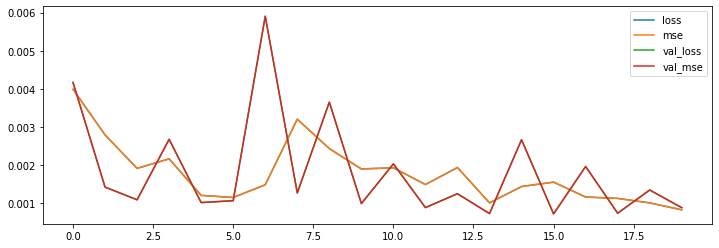

In [ ]:
losses = pd.DataFrame(model_stock.history.history)
losses.plot(figsize=(12,4))

In [ ]:
# make predictions
trainPredict = model_stock.predict(trainX)
testPredict = model_stock.predict(testX)

In [ ]:
# Estimate model performance
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [ ]:
#Training MSE
train_pred_mse = mean_squared_error(trainY_inverse[0], trainPredict[:,0])
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

train pred MSE:  1.233289871452956
train pred RMSE:  1.110535848792355


In [ ]:
#Testing MSE
test_pred_mse = mean_squared_error(testY_inverse[0], testPredict[:,0])
print("test pred MSE: ", test_pred_mse)
#Testing RMSE
test_pred_rmse = np.sqrt(test_pred_mse)
print("test pred RMSE: ", test_pred_rmse)

test pred MSE:  3.342696440421165
test pred RMSE:  1.8283042526946014


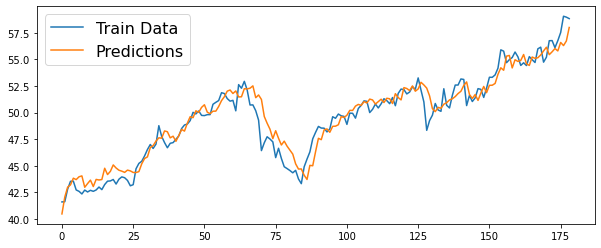

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(trainY_inverse[0])
plt.plot(trainPredict[:,0])

plt.legend(('Train Data', 'Predictions'), fontsize=16)

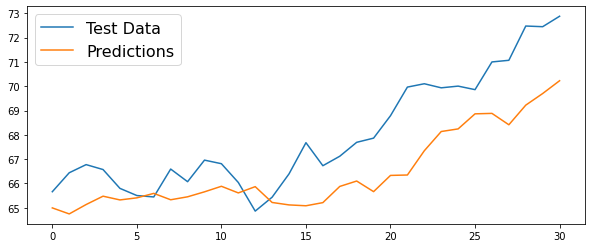

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(testY_inverse[0])
plt.plot(testPredict[:,0])

plt.legend(('Test Data', 'Predictions'), fontsize=16)

##NN on AirPassenger (Normalized version)

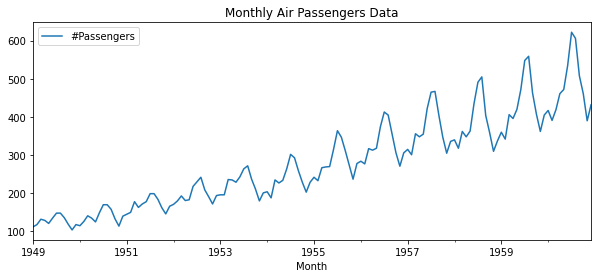

In [ ]:
air_passengers_data = pd.read_csv('AirPassengers.csv', index_col=[0], parse_dates=[0])
air_passengers_data.plot(title="Monthly Air Passengers Data", figsize=(10,4))

In [ ]:
#convert to numpy array
data_values = air_passengers_data.values

In [ ]:
dataset = data_values.astype('float32') #Convert values to float

In [ ]:
# Normalization is optional but recommended for neural network as certain 
# activation functions are sensitive to magnitude of numbers. 
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

In [ ]:
#We cannot use random way of splitting dataset into train and test as
#the sequence of events is important for time series.
#So let us take first 80% values for train and the remaining for testing
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

In [ ]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [ ]:
seq_size = 12
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [ ]:
model_air = Sequential()
model_air.add(Dense(64, input_dim=seq_size, activation='relu')) 
model_air.add(Dense(32, activation='relu')) 
model_air.add(Dense(1))
model_air.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])
print(model_air.summary()) 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                832       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_air.fit(trainX, trainY, validation_split=0.1,
          verbose=1, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 73ms/step - loss: 0.0933 - mse: 0.0933 - val_loss: 0.1679 - val_mse: 0.1679
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0530 - val_mse: 0.0530
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0058 - mse: 0.00

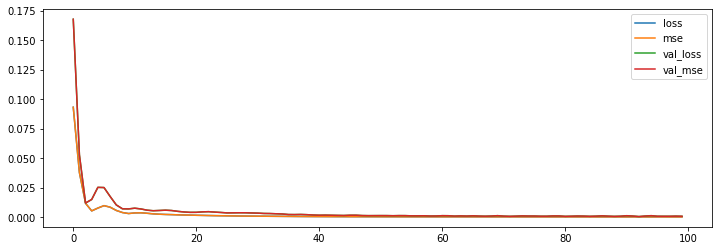

In [ ]:
losses = pd.DataFrame(model_air.history.history)
losses.plot(figsize=(12,4))

In [ ]:
# make predictions
trainPredict = model_air.predict(trainX)
testPredict = model_air.predict(testX)

In [ ]:
# Estimate model performance
#Since we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [ ]:
#Train MSE
train_pred_mse = mean_squared_error(trainY_inverse[0], trainPredict[:,0])
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

train pred MSE:  102.26706135217613
train pred RMSE:  10.112717802459244


In [ ]:
#Test MSE
test_pred_mse = mean_squared_error(testY_inverse[0], testPredict[:,0])
print("test pred MSE: ", test_pred_mse)
#Test RMSE
test_pred_rmse = np.sqrt(test_pred_mse)
print("test pred RMSE: ", test_pred_rmse)

test pred MSE:  340.1003475191677
test pred RMSE:  18.44180976800183


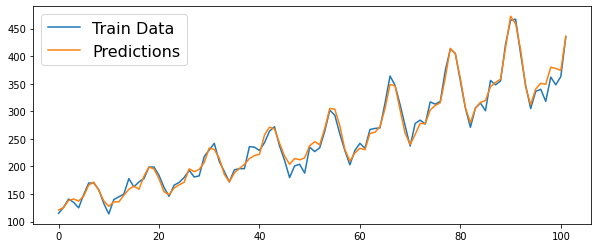

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(trainY_inverse[0])
plt.plot(trainPredict[:,0])

plt.legend(('Train Data', 'Predictions'), fontsize=16)

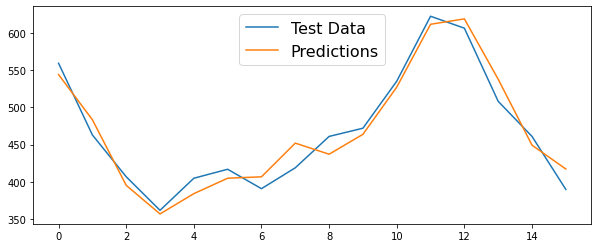

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(testY_inverse[0])
plt.plot(testPredict[:,0])

plt.legend(('Test Data', 'Predictions'), fontsize=16)

##NN on AirPassenger (Unnormalized version)

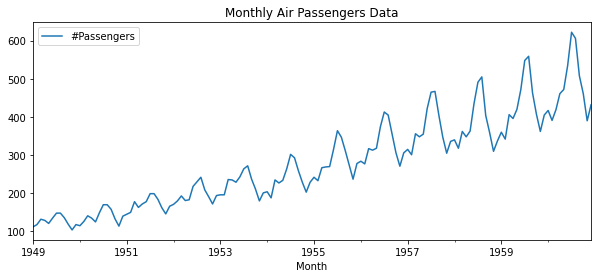

In [ ]:
air_passengers_data = pd.read_csv('AirPassengers.csv', index_col=[0], parse_dates=[0])
air_passengers_data.plot(title="Monthly Air Passengers Data", figsize=(10,4))

In [ ]:
data_values = air_passengers_data.values
dataset = data_values.astype('float32') #Convert values to float

In [ ]:
#We cannot use random way of splitting dataset into train and test as
#the sequence of events is important for time series.
#So let us take first 80% values for train and the remaining for testing
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

In [ ]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [ ]:
seq_size = 12
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [ ]:
model_air_UN = Sequential()
model_air_UN.add(Dense(64, input_dim=seq_size, activation='relu')) #12
model_air_UN.add(Dense(32, activation='relu'))  #8
model_air_UN.add(Dense(1))
model_air_UN.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])
print(model_air_UN.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                832       
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_air_UN.fit(trainX, trainY, validation_split=0.1,
          verbose=1, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 79ms/step - loss: 57909.6484 - mse: 57909.6484 - val_loss: 84346.0703 - val_mse: 84346.0703
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 33667.4219 - mse: 33667.4219 - val_loss: 40682.6445 - val_mse: 40682.6445
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 16679.0527 - mse: 16679.0527 - val_loss: 14249.0713 - val_mse: 14249.0713
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 6507.2705 - mse: 6507.2705 - val_loss: 3980.7478 - val_mse: 3980.7478
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 1848.0186 - mse: 1848.0186 - val_loss: 5097.6250 - val_mse: 5097.6250
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 1399.9720 - mse: 1399.9720 - val_loss: 10862.6992 - val_mse: 10862.6992
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 2745.7776 - mse: 2745.7776 - val_loss: 14876.3662 - val_mse: 1

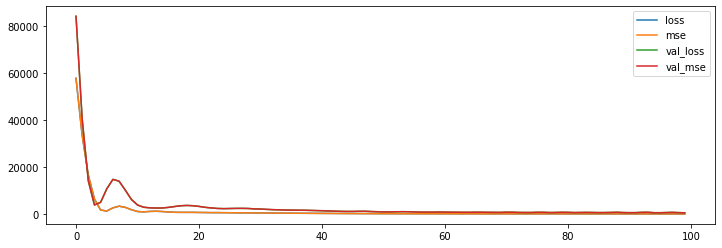

In [ ]:
losses = pd.DataFrame(model_air_UN.history.history)
losses.plot(figsize=(12,4))

In [ ]:
# make predictions
trainPredict = model_air_UN.predict(trainX)
testPredict = model_air_UN.predict(testX)

In [ ]:
#Training MSE
train_pred_mse = mean_squared_error(trainY, trainPredict)
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

train pred MSE:  224.63847
train pred RMSE:  14.987945


In [ ]:
#Testing MSE
test_pred_mse = mean_squared_error(testY, testPredict)
print("test pred MSE: ", test_pred_mse)
#Testing RMSE
test_pred_rmse = np.sqrt(test_pred_mse)
print("test pred RMSE: ", test_pred_rmse)

test pred MSE:  514.9031
test pred RMSE:  22.691475


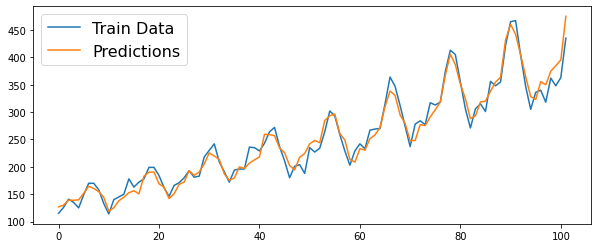

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(trainY)
plt.plot(trainPredict)

plt.legend(('Train Data', 'Predictions'), fontsize=16)

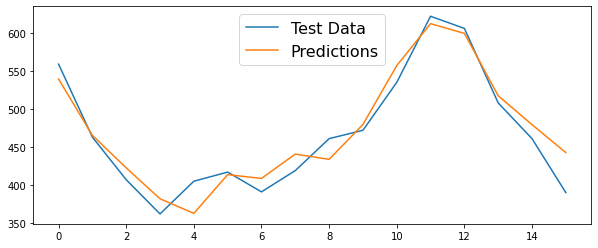

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(testY)
plt.plot(testPredict)

plt.legend(('Test Data', 'Predictions'), fontsize=16)

##Practice of NN
Please try to use different NN to improve the performance of prediction

### Data Selection

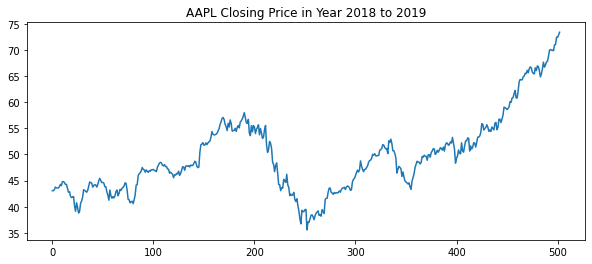

In [ ]:
aapl_stock_data = pd.read_csv('AAPL.csv', index_col=[0], parse_dates=[0], dayfirst=True)
aapl_closing_prices_2018_2019 = aapl_stock_data["Close"].loc['2018-01-01':'2019-12-31']  #You can use different periods of data
aapl_closing_prices_2018_2019.reset_index(drop=True, inplace=True)
aapl_closing_prices_2018_2019.plot(title="AAPL Closing Price in Year 2018 to 2019", figsize=(10,4))

### Parameter Setting

In [ ]:
training_size=450
seq_size = 20

### Model Configuration

In [ ]:
model_practice = Sequential()
model_practice.add(Dense(64, input_dim=seq_size, activation='relu')) 
model_practice.add(Dense(32, activation='relu'))  
model_practice.add(Dense(1))
model_practice.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])
print(model_practice.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                1344      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________
None


### The following code is fixed

In [ ]:
train_data = aapl_closing_prices_2018_2019.iloc[:training_size]
test_data = aapl_closing_prices_2018_2019.iloc[training_size:]

In [ ]:
data_df = pd.DataFrame(aapl_closing_prices_2018_2019)
scaler = MinMaxScaler()
scaler.fit(data_df)

MinMaxScaler()

In [ ]:
scaled_data=scaler.transform(data_df)

In [ ]:
scaled_train_data = scaled_data[:training_size]
scaled_test_data = scaled_data[training_size:]

In [ ]:
#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period.
#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1).
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [ ]:
#Train and Test data
trainX, trainY = to_sequences(scaled_train_data, seq_size)
testX, testY = to_sequences(scaled_test_data, seq_size)

In [ ]:
model_practice.fit(trainX, trainY, validation_split=0.1,
          verbose=1, epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 15ms/step - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 8/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0

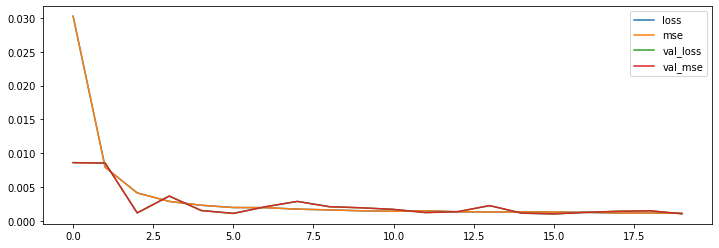

In [ ]:
losses = pd.DataFrame(model_practice.history.history)
losses.plot(figsize=(12,4))

In [ ]:
# make predictions
trainPredict = model_practice.predict(trainX)
testPredict = model_practice.predict(testX)

In [ ]:
# Estimate model performance
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [ ]:
#Training MSE
train_pred_mse = mean_squared_error(trainY_inverse[0], trainPredict[:,0])
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

train pred MSE:  1.5189936990659854
train pred RMSE:  1.232474624106308


In [ ]:
#Testing MSE
test_pred_mse = mean_squared_error(testY_inverse[0], testPredict[:,0])
print("test pred MSE: ", test_pred_mse)
#Testing RMSE
test_pred_rmse = np.sqrt(test_pred_mse)
print("test pred RMSE: ", test_pred_rmse)

test pred MSE:  2.341872057553701
test pred RMSE:  1.5303176328964196


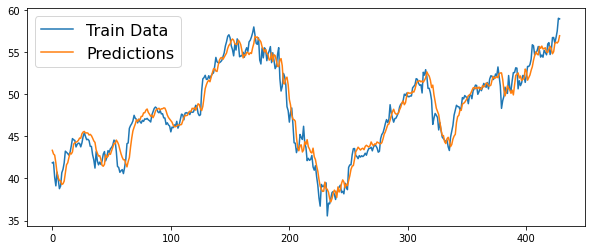

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(trainY_inverse[0])
plt.plot(trainPredict[:,0])

plt.legend(('Train Data', 'Predictions'), fontsize=16)

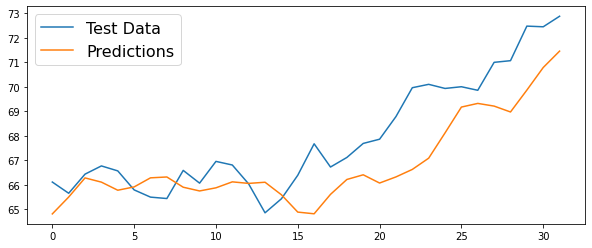

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(testY_inverse[0])
plt.plot(testPredict[:,0])

plt.legend(('Test Data', 'Predictions'), fontsize=16)